In [1]:
import numpy as np
from numpy.random import exponential, normal, randint

In [2]:
import matplotlib.pyplot as plt

In [3]:
def bm(x=0.0, T=1.0, n=10000):
    #Simulates one-dimensional brownian motion on the interval [0,T] start at point x.
    # n is the inverse increment length. The larger n is, the closer the output will be to a realisation of a 'true' BM.
    # Output: t_array - timepoints associated with each position value, and x_array - the positions themselves.
    
    x_array=np.zeros(n+1)
    t_array=np.linspace(0,T,n+1)
    eps_array=normal(loc=0, scale=T/n, size=n)
    
    x_array[0]=x
    for i in range(n):
        x_array[i+1]=x_array[i]+eps_array[i]
    return t_array, x_array

In [4]:
def bbm(x_0=0.0, T=1.0, n=10000, avg_branches=4,
        plot_results=False, branch_color='brown',
        simulate_blossoms=True, avg_blossoms=8, flower_color='tab: pink',
        branch_deaths=False, branch_death_rate=0.1):
    #Function to simulate a branching Brownian Motion (BBM) which is a one-dimenstonal Brownian Motion 
    # which randomly gives rise to another Brownian Motion from its current position at
    # independent, exponentially distributed branching times.
    # Parameters: x_0 - start position. Default is 0.0.
    # T - length of time interval. Default is 1.0.
    # n - inverse increment length. The larger n is, the closer the output will be to a realisation of a 'true' BBM.
    # avg_branches - the number of branchings that will occur within a time interval of 1.0. Theoretically,
    # this is also equal to the inverse of the branching rate. Default value is 4
    # plot_results - If true a plot will be created of the resulting BBM. Default is True.
    # avg_blossomes - the number of branchings that will occur within a time interval of 1.0. Theoretically,
    # this is also equal to the inverse of the blossoming rate. Default value is 8
    # NOT YET WORKING
    # branch_deaths - If true the branches will also die at a rate specified by the branch_death_rate. Default value is False.
    # branch_death_rate - Rate at which branches will die if the branch_deaths option is set to True. Default value is 0.1.
    
    
    #initialise empty lists to contain position (x_arr) and time (t_arr) arrays for each branch that occurs in the BBM,
    # as well as initial position, time-, and index of position array (x_arr) at which the branching occurs
    list_xarr=[]
    list_tarr=[]
    x=x_0
    t=0
    argx=0
    
    
    branch_rate=1/avg_branches
    blossom_rate=1/avg_blossoms
    
    i=0
    parent_list=[0] #we will save the index of the parent branch here
    num_branches=[i]
    branching_times=[t]
    while t < T:
        tarr, xarr = bm(x,T-t,n-argx)
        tarr=tarr+t
        list_tarr.append(tarr)
        list_xarr.append(xarr)
        
        i+=1
        num_branches.append(i)
        
        t+=exponential(scale=branch_rate*i)
        t=round(n*t,0)/n
        branching_times.append(t)
        
        if t < T:
            which_arr=randint(low=0,high=i)
            parent_list.append(which_arr)
            
            tarr=list_tarr[which_arr]
            xarr=list_xarr[which_arr]
            
            argx=np.arange(len(tarr))[np.argmin(np.abs(tarr-t))]
            
            x=xarr[argx]
    #kill some of the branches early: NOT WORKING
    if branch_deaths:
        if i>0:
            for j in range(1,i):
                death_time=branching_times[j]+exponential(branch_death_rate)
                print('Death time is:',death_time)
                list_tarr[j]=list_tarr[j][list_tarr[j]<death_time] #kills branch at death time
                print('Times for this branch are:',list_tarr[j])
                list_xarr[j]=list_xarr[j][:len(list_tarr[j])]
                print('Positions for this branch are:',list_xarr[j])
                for k in np.arange(i)[np.array(parent_list)==j]:
                    if branching_times[k]>death_time:
                        list_tarr[k]=[]
                        list_xarr[k]=[]
            
    list_blossom_tarr=[]
    list_blossom_xarr=[]
    
    #Blossoms on branches occuring at exponential wait times with rate blossom_rate.
    if simulate_blossoms:
        for k in range(i):
            tarr=list_tarr[k]
            if len(tarr)>0:
            
                t=branching_times[k]
                blossom_times=[]
                while t < max(tarr):
                    t+=exponential(scale=blossom_rate)
                    if t<max(tarr):
                        blossom_times.append(t)
            
                list_blossom_tarr.append(blossom_times)
            
                xarr_blossom=[]
                for t in blossom_times:
                    argx=np.arange(len(tarr))[np.argmin(np.abs(tarr-t))]
                    xarr=list_xarr[k]
                    x=xarr[argx]
                    xarr_blossom.append(x)
                list_blossom_xarr.append(xarr_blossom)
    
    if plot_results:
        plt.subplots(figsize=(24,4))
        plt.grid(False)
        plt.axis('off')
        for j in range(i):
            for k in range(len(list_blossom_tarr)):
                plt.scatter(list_blossom_tarr[k],list_blossom_xarr[k],color=flower_color,marker='X')
            plt.plot(list_tarr[j],list_xarr[j],color=branch_color)
            
    return list_tarr, list_xarr, list_blossom_tarr, list_blossom_xarr

In [12]:
def create_plots(num_plots,figure_size,branches,blossoms, increments=10000, plot_results=False, 
                 branch_deaths=False, branch_color='brown', 
                 flower_color='tab:pink', plot_blossoms=True):

    list_tlist=[]
    list_xlist=[]
    list_blossom_tlist=[]
    list_blossom_xlist=[]

    for i in range(num_plots):
        test_t, test_x, test_blossom_t, test_blossom_x=bbm(avg_branches=branches,
                                                           simulate_blossoms=plot_blossoms,
                                                           avg_blossoms=blossoms,
                                                           n=increments,
                                                       plot_results=False, branch_deaths=False)
        list_tlist.append(test_t)
        list_xlist.append(test_x)
        list_blossom_tlist.append(test_blossom_t)
        list_blossom_xlist.append(test_blossom_x)

    for m in range(len(list_tlist)):
        plt.subplots(figsize=figure_size)
        plt.grid(False)
        plt.axis('off')
        for k in range(len(list_tlist[m])):
            plt.plot(list_tlist[m][k],list_xlist[m][k],color=branch_color,linewidth=0.75)
        if plot_blossoms:
            for k in range(len(list_blossom_tlist[m])):
                plt.scatter(list_blossom_tlist[m][k],list_blossom_xlist[m][k],marker='X',color=flower_color,s=50)
        plt.show()

Avg number of branchings is : 1


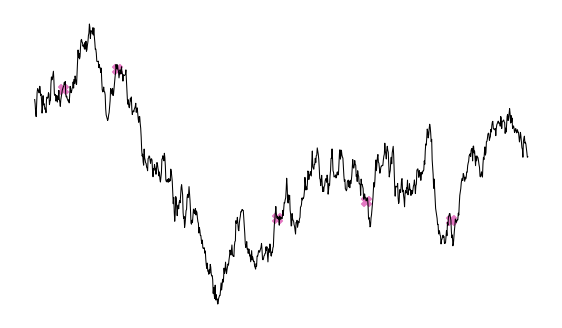

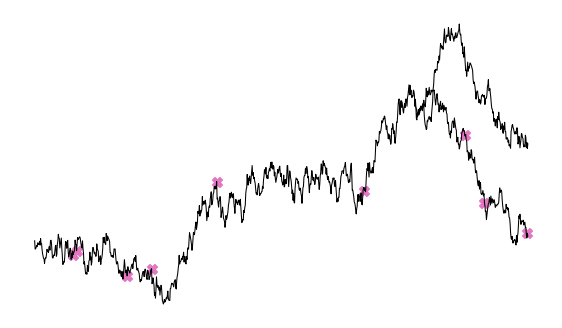

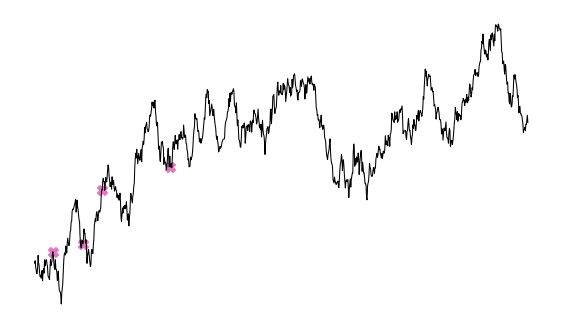

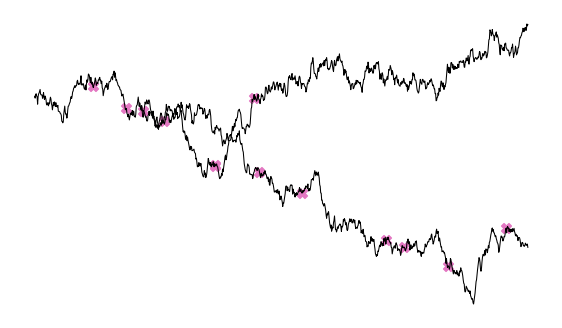

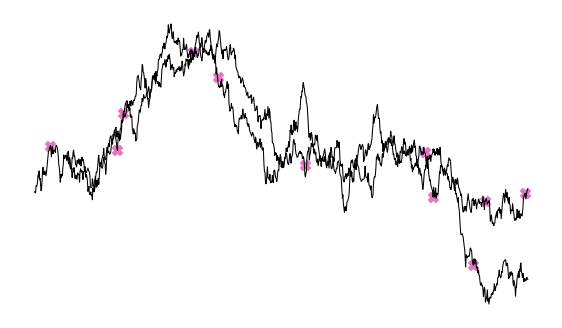

Avg number of branchings is : 2


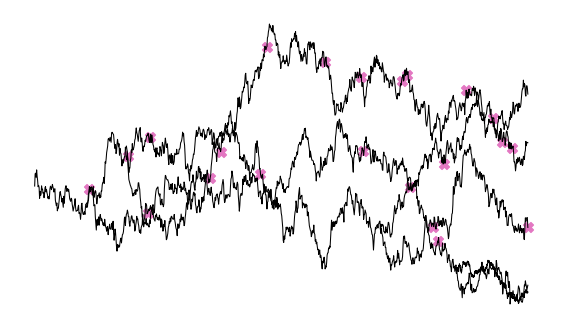

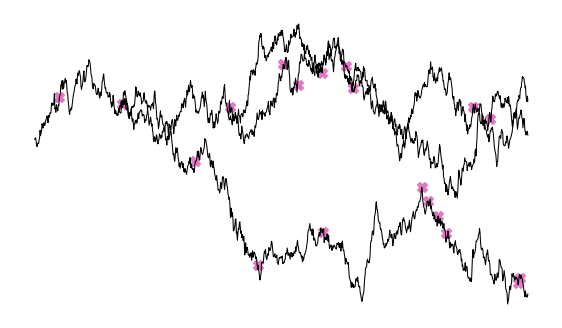

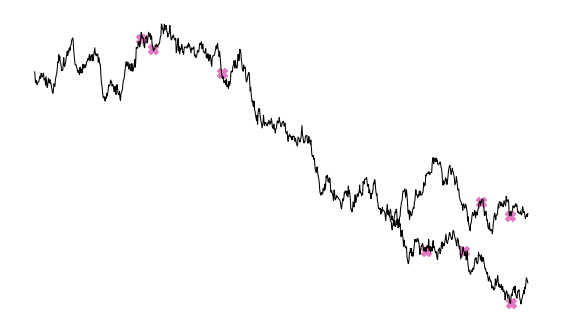

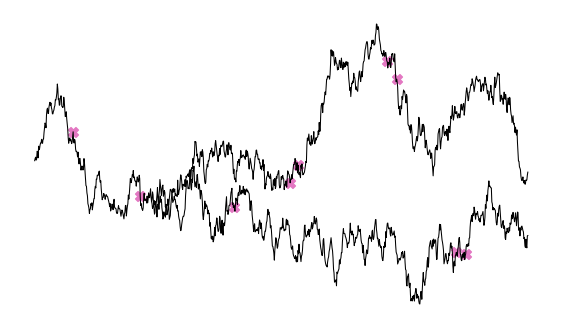

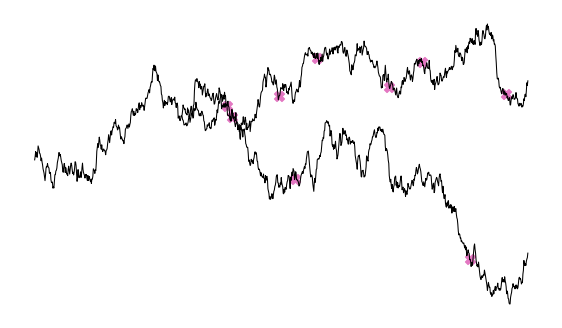

Avg number of branchings is : 3


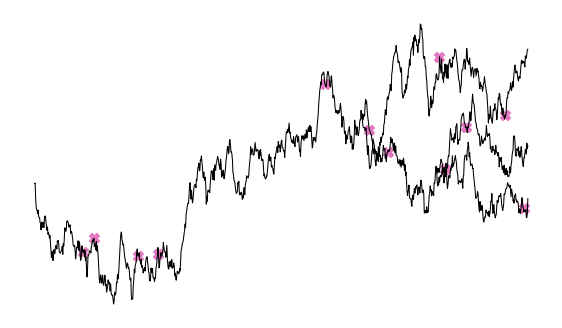

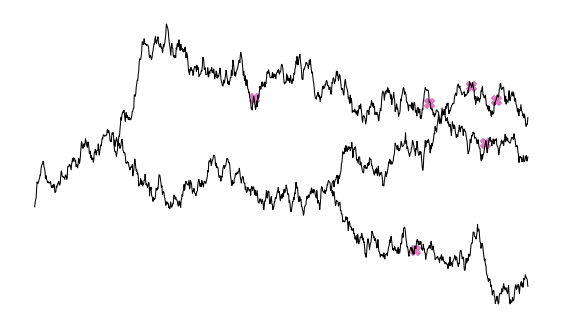

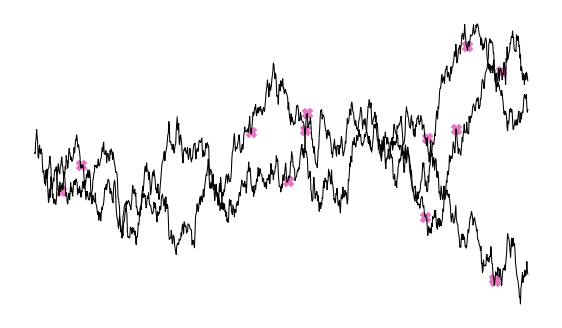

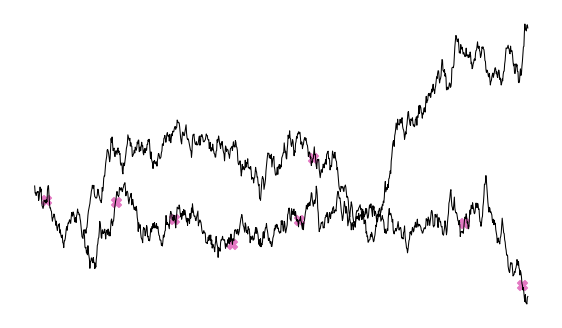

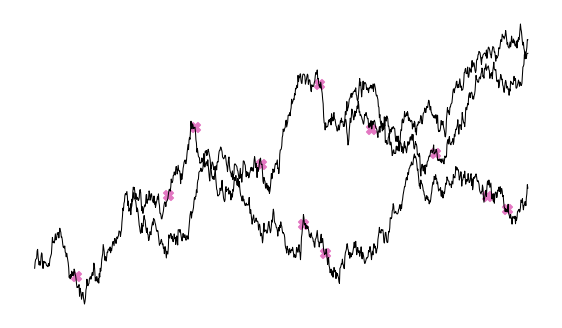

Avg number of branchings is : 4


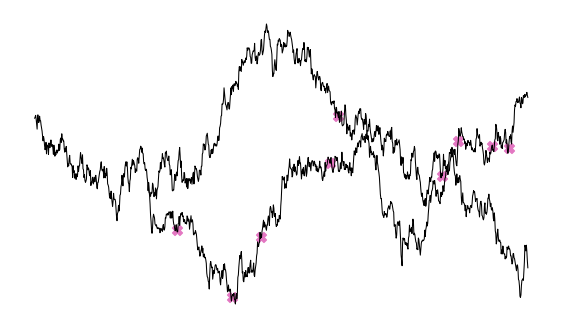

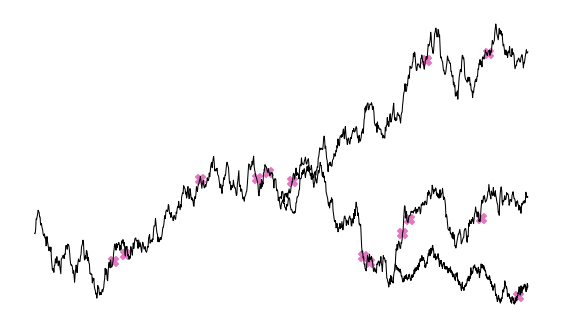

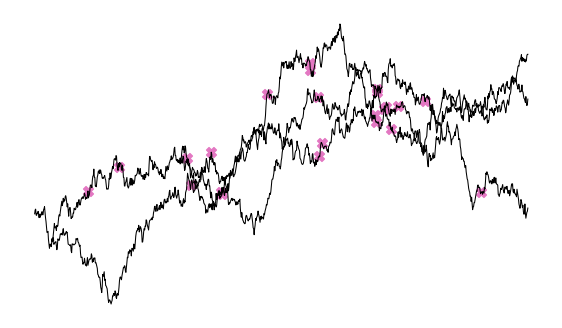

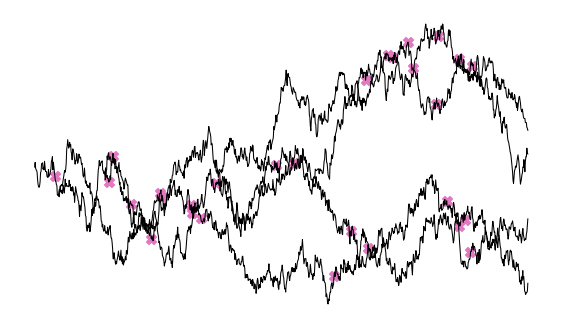

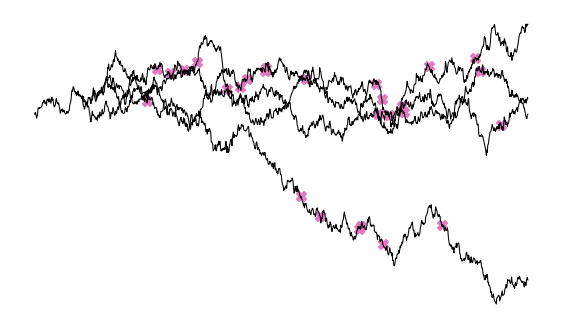

Avg number of branchings is : 5


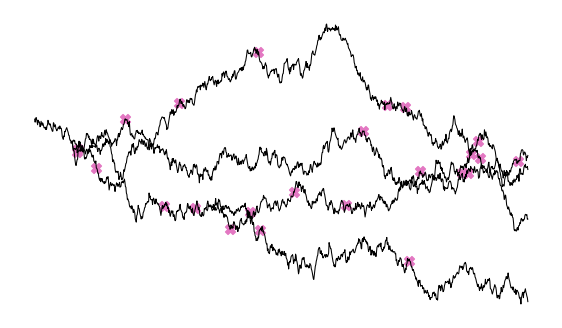

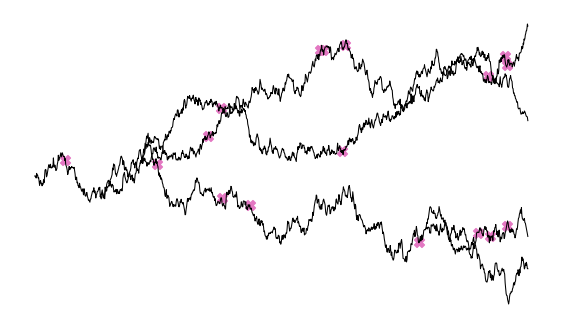

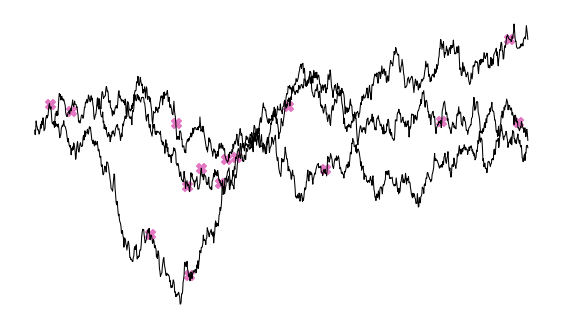

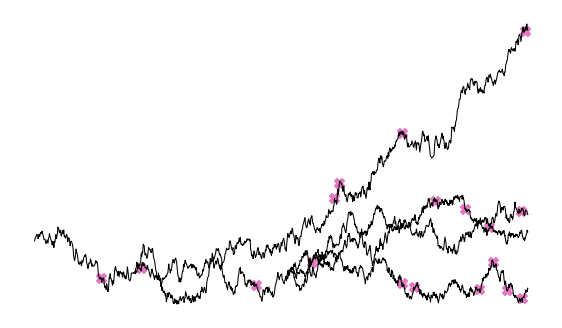

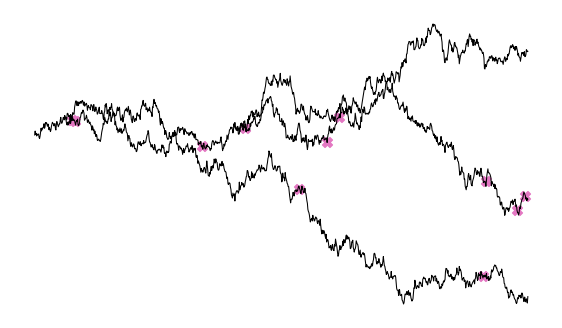

Avg number of branchings is : 10


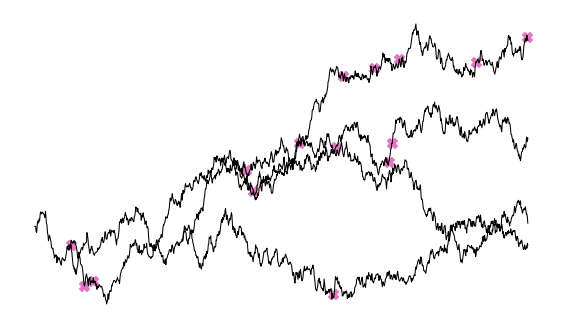

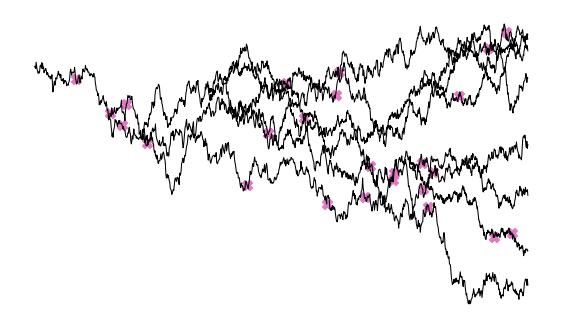

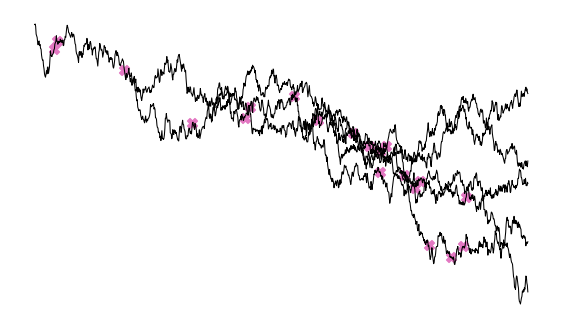

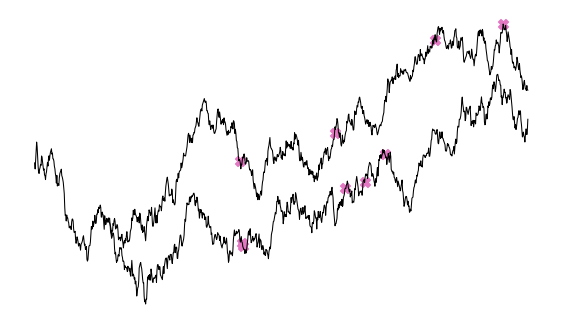

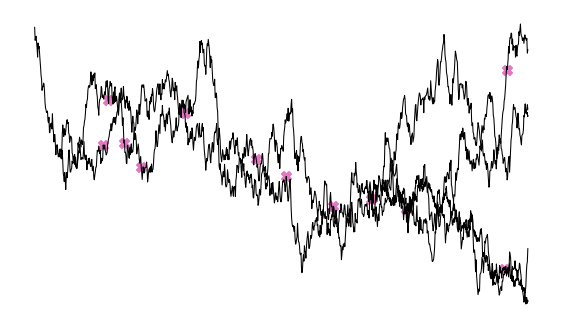

Avg number of branchings is : 20


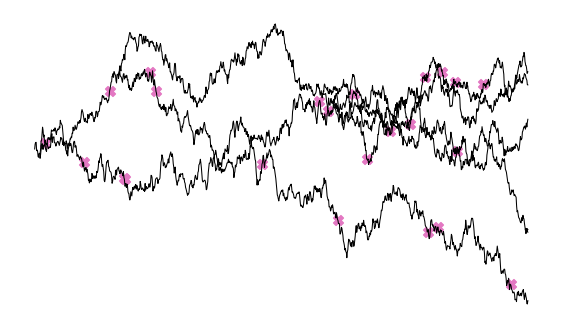

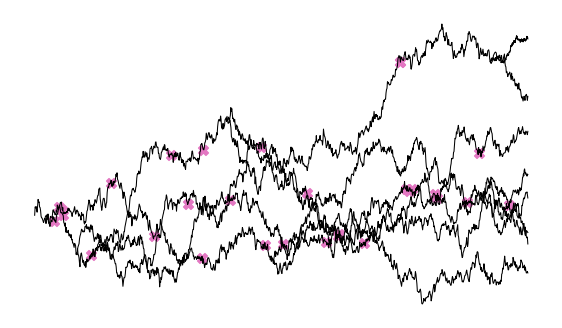

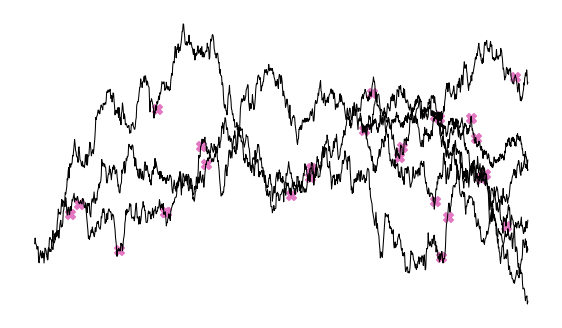

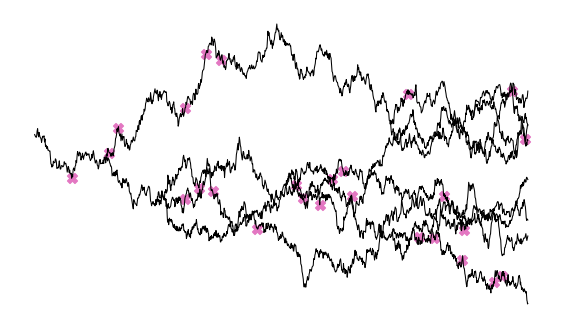

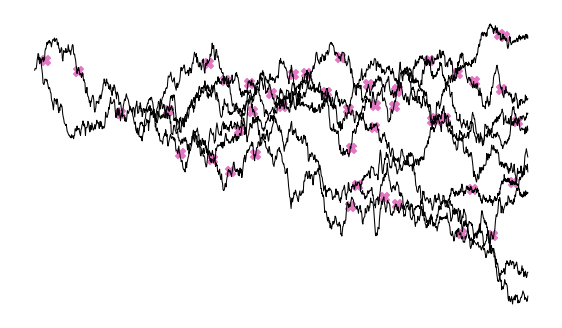

Avg number of branchings is : 30


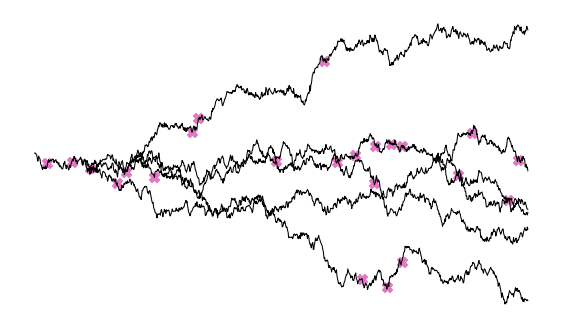

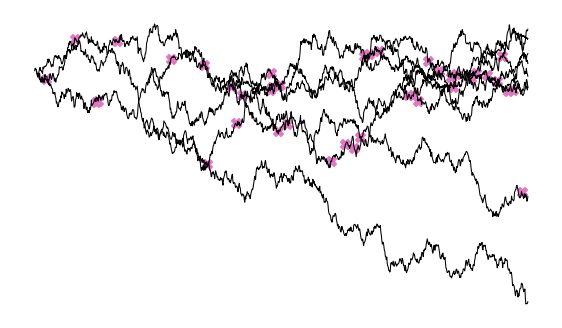

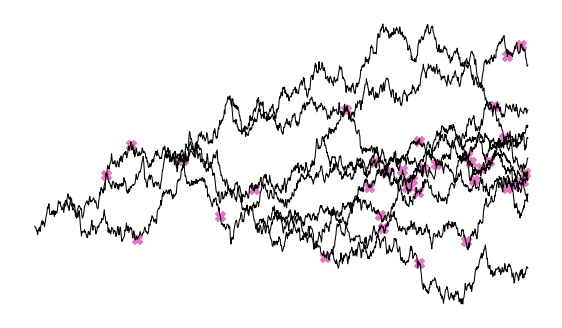

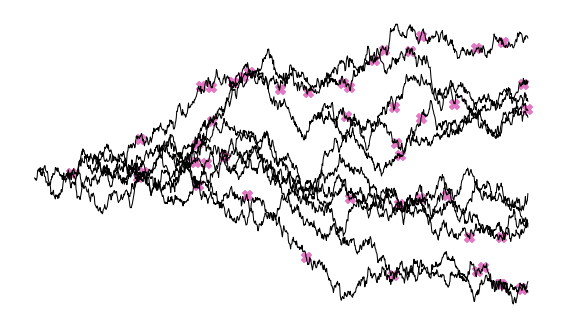

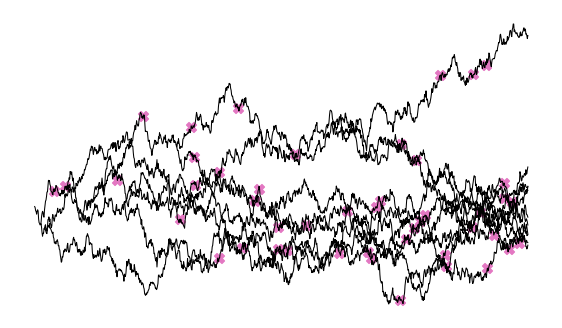

Avg number of branchings is : 40


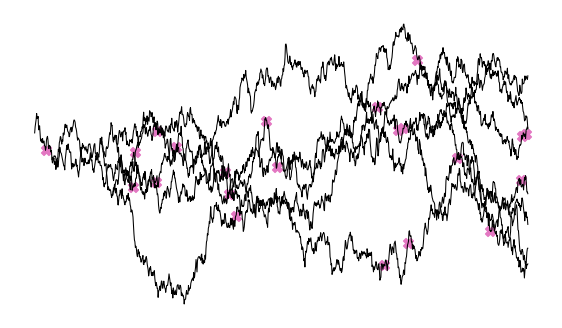

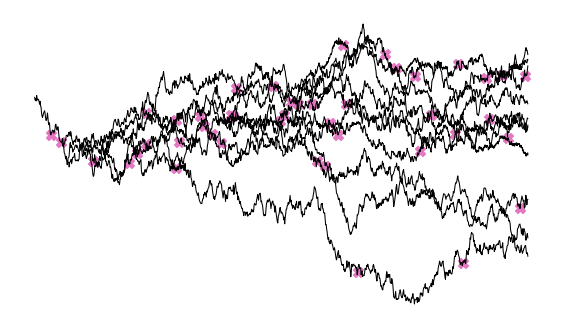

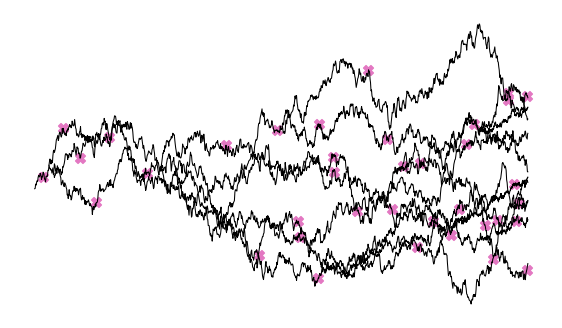

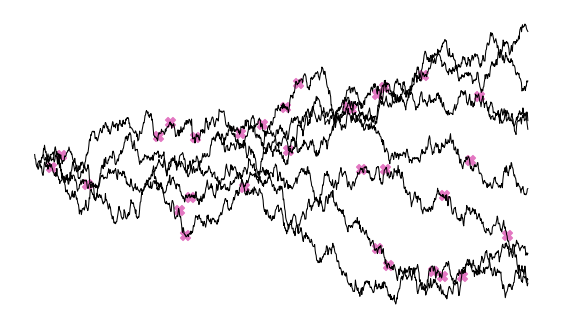

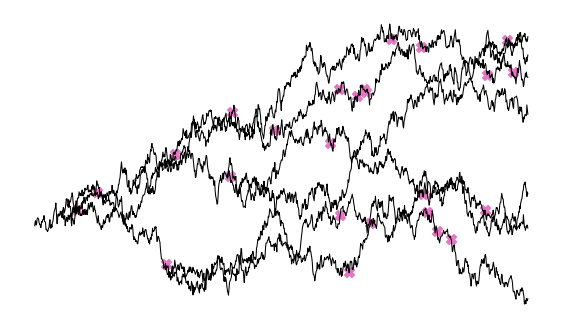

Avg number of branchings is : 50


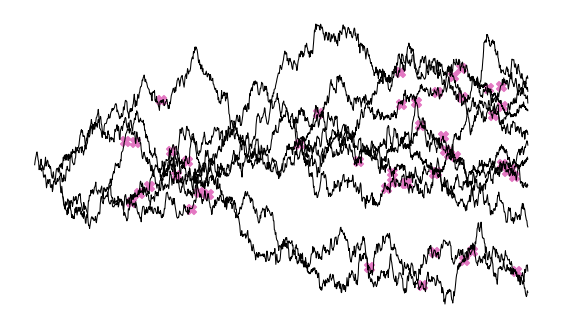

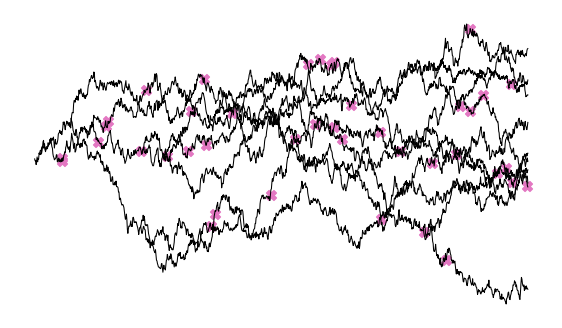

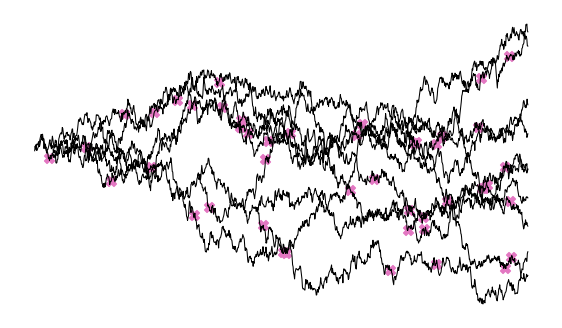

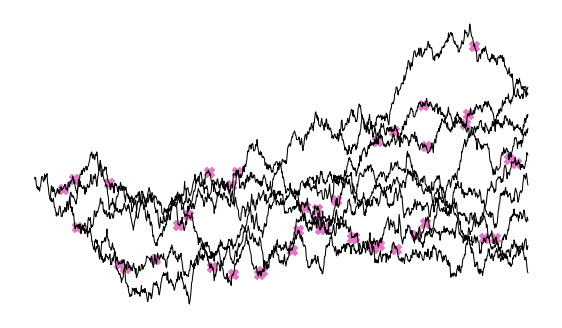

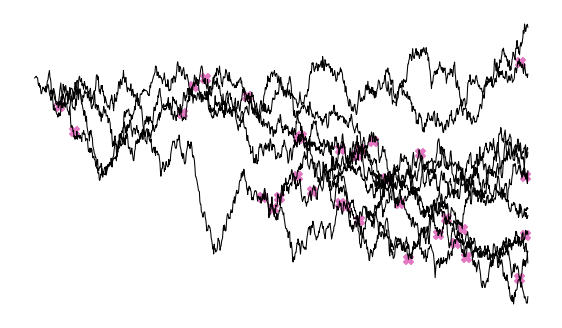

In [13]:
num_plots=5
figure_size= (7,4)
n=1000
blossoms=6

branches_list = [1,2,3,4,5,10,20,30,40,50]
for branches in branches_list:
    print('Avg number of branchings is : %d'%(branches))
    create_plots(num_plots,figure_size,branches,blossoms,increments=n, branch_color='black')